In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# Set up connection the SQLite DB
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# Reflect the existing database into a new model by creating a base class
Base = automap_base()
# Environment set up for SQLAlchemy

# Reflect the schema of the SQLite tables into the code to create mappings
#  prepare() fxn; creating classes that keep code separate (decoupled)
Base.prepare(engine, reflect=True)

In [10]:
# Confirm Automap was able to find all of the DB data by viewing all of the classes
#  Base.classes - access to all classes; keys() - references names of classes
Base.classes.keys()

['measurement', 'station']

In [11]:
# For ease of use, Base.class.<class name> referencing can be replaced by reassigning variables,
#  then saving references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create the Session link from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

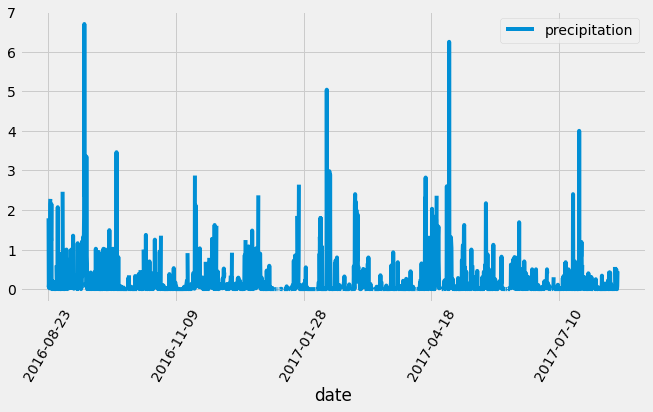

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database (the most recent date using dt.date()
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set using dt.timedelta()
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Create a variable to store query results
results = []
# Add the session with two parameters and filter on most recent data, extracting all the results from the query (.filter(), .all())
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Print the results
#print(results)

# To access query results, save to Pandas df
df = pd.DataFrame(results, columns=['date','precipitation'])
#print(df)

# To set the index (set_index()) to the date column, use inplace=True to modify existing df (without creating a new one)
df.set_index(df['date'], inplace = True)
#print(df)

# And print the df without the index to avoid the duplicate date-date naming
#print(df.to_string(index=False))

# Sort the dataframe by date using the sort_index() fxn
df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,5))
plt.xticks(rotation=60)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# QUESTION: How many stations are available in this dataset?

# Add the starting point for the query with session.query()
# Count the dataset, using the func.count with the ???BASECLASS format
# Add all() fxn to return a list
session.query(func.count(Station.station)).all()

# 9 stations

[(9,)]

In [16]:
# QUESTION: What are the most active stations?
# List the stations and the counts in descending order.

# Start with the session and add some parameters
#session.query(Measurement.station, func.count(Measurement.station))
# Add filters to narrow the data down; group the data by station name, ordered descending by count
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
 
# Left col = station ID
# Right col = count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# QUESTION: Using the station id from the previous query, what are the the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

# Start the session looking to apply func.min, func.max, func.avg; filter to the station of interest (USC00519281);
#  
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

# Low: 54, High: 85, Avg: 72

[(54.0, 85.0, 71.66378066378067)]

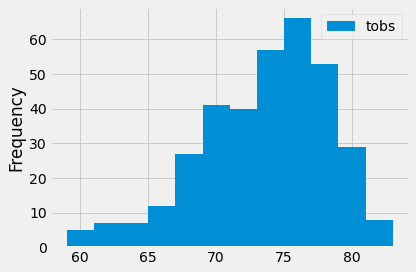

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

#print(results)

# Convert to a data frame
df = pd.DataFrame(results, columns=['tobs'])
#print(df)

# Plot the observations, creating a histogram
df.plot.hist(bins=12)
plt.tight_layout()

# Most days over 67 degrees

In [ ]:
# Flask Creation - See app.py
# Personal - No need to use waitress; did need to use set FLASK_ENV=development


# Import dependency
#from flask import Flask

# Create a new Flask app instance
#  Denote the name of the current fxn using magic methods
#  https://www.geeksforgeeks.org/dunder-magic-methods-python/
#app = Flask(__name__)

# Create Flask routes
#  Define the starting point (aka: root) with / to define highest level in hierarachy
#@app.route('/')
#def hello_world():
#    return 'Hello world'

# Run the Flask app
# 1. Use the command line to navigate to the folder where code is saved.
# 2. Open Anaconda Powershell and enter: set FLASK_APP=app.py
# 3. Run Flask app by typing into the command line, followed by enter: flask run
#  The return should show the localhost address and a port number (ie, where the command is running)
# 4. Copy and paste the localhost address into the web browser to see the print out.

# Did not execute
# https://exerror.com/warning-this-is-a-development-server-do-not-use-it-in-a-production-deployment-use-a-production-wsgi-server-instead/
# Watiress needed? No.
#if __name__ == "__main__":
#    from waitress import serve
#    serve(app, host="0.0.0.0", port=8080)
    
# Nor this ...
# https://stackoverflow.com/questions/61926197/trying-to-run-flask-with-the-following-code
#if __name__ == "__main__":
#    app.run(host='0.0.0.0', port=80)

# Nor this ...
# if __name__ == "__main__":
#        app.run(host='0.0.0.0', port=80, DEBUG=True)

#### This worked ... In Anaconda Prompt (NOT in Anaconda Powershell)
From [StackOverflow](https://stackoverflow.com/questions/61926197/trying-to-run-flask-with-the-following-code) \
  set FLASK_ENV=development \
  set FLASK_APP=app.key \
    flask run

 http://127.0.01.:5000/ > Hello world

In [19]:
# Use magic method __name__ to check file source of running code
import app
print("example __name__ = %s", __name__)

if __name__ == "__main__":
    print("example is being run directly.")
else:
    print("example is being imported")

example __name__ = %s __main__
example is being run directly.
